In [15]:
# pip install Flask opencv-python tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\cflun\anaconda3\lib\site-packages (4.8.1.78)



# Importing the Libraries

In [61]:
import os
import cv2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

#### We preprocess all the images



In [2]:
# Functioning for image preprocessing
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (196, 196))
    img = img / 255.0
    return img

In [5]:
# Specify the paths to the folders
fire_folder = r"C:\Users\cflun\Desktop\Data Analyst 2023\Git Repo\Fire Detection\fire_dataset\fire_images"
non_fire_folder = r"C:\Users\cflun\Desktop\Data Analyst 2023\Git Repo\Fire Detection\fire_dataset\non_fire_images"
smoke_folder = r"C:\Users\cflun\Desktop\Data Analyst 2023\Git Repo\Fire Detection\fire_dataset\smoke_images"

In [6]:
# Get the list of image paths in each folder
fire_img_paths = [os.path.join(fire_folder, file) for file in os.listdir(fire_folder)]
non_fire_img_paths = [os.path.join(non_fire_folder, file) for file in os.listdir(non_fire_folder)]
smoke_img_paths = [os.path.join(smoke_folder, file) for file in os.listdir(smoke_folder)]

### We create a dataframe with filepath images and label (1 = fire , 0 = without fire, 2 = smoke images)



In [44]:
lst_fire = []
for x in fire_img_paths:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in non_fire_img_paths:
  lst_nn_fire.append([x,0])
lst_smoke = []
for x in smoke_img_paths:
  lst_smoke.append([x,2])
lst_complete = lst_fire + lst_nn_fire + lst_smoke
random.shuffle(lst_complete)

In [47]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,1
1,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,0
2,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,0
3,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,0
4,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,0
5,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,0
6,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,2
7,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,2
8,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,0
9,C:\Users\cflun\Desktop\Data Analyst 2023\Git R...,1


In [48]:
df.shape

(8999, 2)

### Although we can see that the dataset is uneven, we do not utilise ImageDataGenerator because the results are still quite decent.


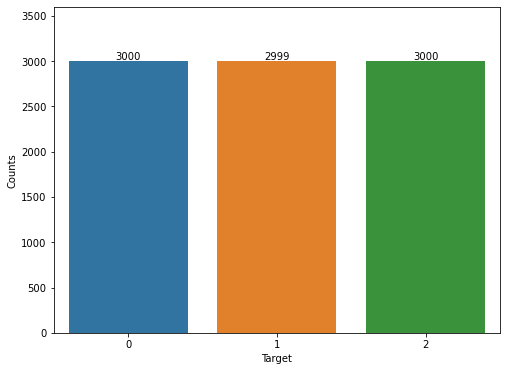

In [52]:
fig = plt.figure(figsize=(8,6)) 
plt.ylim(0,3600)
ax = sns.countplot(x=df['target'])

plt.xlabel('Target')
plt.ylabel('Counts')


# Annotating the bar graph
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

In [7]:
# Preprocess all images
X_fire = np.array([preprocess_image(img_path) for img_path in fire_img_paths])
X_non_fire = np.array([preprocess_image(img_path) for img_path in non_fire_img_paths])
X_smoke = np.array([preprocess_image(img_path) for img_path in smoke_img_paths])

In [8]:
# Create labels for each category (1 for fire, 0 for non-fire, 2 for smoke)
y_fire = np.ones(X_fire.shape[0])
y_non_fire = np.zeros(X_non_fire.shape[0])
y_smoke = 2 * np.ones(X_smoke.shape[0])

In [9]:
# Concatenate the data and labels
X = np.concatenate((X_fire, X_non_fire, X_smoke), axis=0)
y = np.concatenate((y_fire, y_non_fire, y_smoke), axis=0)

### we split the data in train and test


In [10]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y)

In [57]:
# Build the model
model = Sequential()
model.add(Conv2D(128, (2, 2), input_shape=(196, 196, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Three classes: fire, non-fire, smoke

In [58]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 1146s 6s/step - loss: 0.5072 - accuracy: 0.7970 - val_loss: 0.3934 - val_accuracy: 0.8781
Epoch 2/10
200/200 [==============================] - 1100s 6s/step - loss: 0.3065 - accuracy: 0.8928 - val_loss: 0.2877 - val_accuracy: 0.8981
Epoch 3/10
200/200 [==============================] - 1079s 5s/step - loss: 0.2473 - accuracy: 0.9167 - val_loss: 0.3051 - val_accuracy: 0.9044
Epoch 4/10
200/200 [==============================] - 1070s 5s/step - loss: 0.2143 - accuracy: 0.9261 - val_loss: 0.2365 - val_accuracy: 0.9206
Epoch 5/10
200/200 [==============================] - 1067s 5s/step - loss: 0.1758 - accuracy: 0.9397 - val_loss: 0.2260 - val_accuracy: 0.9200
Epoch 6/10
200/200 [==============================] - 1085s 5s/step - loss: 0.1545 - accuracy: 0.9472 - val_loss: 0.2305 - val_accuracy: 0.9250
Epoch 7/10
200/200 [==============================] - 1051s 5s/step - loss: 0.1294 - accuracy: 0.9569 - val_loss: 0.2563 - val_accuracy:

In [59]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

32/32 [==============================] - 29s 875ms/step - loss: 1.1010 - accuracy: 0.3330
Test Loss: 1.1010299921035767, Test Accuracy: 0.3330000042915344


In [53]:
y_pred = model.predict(X_test)

32/32 [==============================] - 28s 861ms/step


In [42]:
# Save the model
model.save('fire_detection_model.h5')

In [43]:
def preprocess_frame(frame, target_height, target_width):
    # Resize the frame to the target dimensions
    preprocessed_frame = cv2.resize(frame, (target_width, target_height))

    # Normalize pixel values to be in the range [0, 1]
    preprocessed_frame = preprocessed_frame / 255.0

    # Add any additional preprocessing steps if required

    return preprocessed_frame


# Define your target dimensions
target_height = 196
target_width = 196

# Load your trained model
# model = ...

# Open a connection to the webcam (0 represents the default camera)
cap = cv2.VideoCapture(0)

# ... (previous code)

while True:
    ret, frame = cap.read()  # Read a frame from the webcam
    if not ret:
        break

    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame, target_height, target_width)
    preprocessed_frame = preprocessed_frame.reshape(1, target_height, target_width, 3)

    # Perform fire detection using your model
    predictions = model.predict(preprocessed_frame)

    # Get the index of the maximum probability (predicted class)
    predicted_class = np.argmax(predictions)

    # Process the predictions
    if predicted_class == 0:  # Assuming 0 corresponds to non-fire class
        # Display red box with "No Fire Detected" message
        cv2.rectangle(frame, (10, 10), (frame.shape[1] - 10, frame.shape[0] - 10), (0, 0, 0), 2)
        cv2.putText(frame, "Fire Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    elif predicted_class == 1:  # Assuming 1 corresponds to fire class
        # Display green box with "Fire Detected" message
        cv2.rectangle(frame, (10, 10), (frame.shape[1] - 10, frame.shape[0] - 10), (0, 255, 0), 2)
        cv2.putText(frame, "Smoke Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    elif predicted_class == 2:  # Assuming 2 corresponds to smoke class
        # Display black box with "Smoke Detected" message
        cv2.rectangle(frame, (10, 10), (frame.shape[1] - 10, frame.shape[0] - 10), (0, 0, 255), 2)
        cv2.putText(frame, "Non Fire Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (150, 150, 150), 2)

    # Display the frame with the overlay
    cv2.imshow('Fire Detection', frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()  # Release the webcam
cv2.destroyAllWindows()


1/1 [==============================] - 0s 72ms/step


In [60]:
import pickle

# Save the trained model to a file
with open('fire_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://01e3b3d0-3e8e-4baa-9f24-e5ca490db454/assets


INFO:tensorflow:Assets written to: ram://01e3b3d0-3e8e-4baa-9f24-e5ca490db454/assets


In [63]:
# Load the model
loaded_model = tf.keras.models.load_model('fire_detection_model.h5')
